In [1]:
import pandas as pd
import numpy as np
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import altair as alt

In [2]:
df=pd.read_csv('../data/processed/df_cleaned_nba_prediction.csv')
df

,GP,MIN,PTS,FGM,FGA,3P Made,3PA,FTM,FTA,OREB,...,REB,AST,STL,BLK,TOV,TARGET_5Yrs,CALC3P%,CALCFG%,CALCFT%,TARGET_5Yrs_Inv
0,80,24.3,7.8,3.0,6.4,0.1,0.3,2.0,2.9,2.2,...,3.8,3.2,1.1,0.2,1.6,1,33.333333,46.875000,68.965517,0
1,75,21.8,10.5,4.2,7.9,0.0,0.0,2.4,3.6,3.6,...,6.6,0.7,0.5,0.6,1.4,1,0.000000,53.164557,66.666667,0
2,85,19.1,4.5,1.9,4.5,0.4,1.2,0.4,0.6,0.6,...,2.4,0.8,0.4,0.2,0.6,1,33.333333,42.222222,66.666667,0
3,63,19.1,8.2,3.5,6.7,0.3,0.8,0.9,1.5,0.8,...,3.0,1.8,0.4,0.1,1.9,1,37.500000,52.238806,60.000000,0
4,63,17.8,3.7,1.7,3.4,0.5,1.4,0.2,0.5,2.4,...,4.9,0.4,0.4,0.6,0.7,1,35.714286,50.000000,40.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,32,9.2,1.8,0.7,1.8,0.0,0.0,0.4,0.6,0.3,...,1.9,0.5,0.3,0.2,0.4,1,0.000000,38.888889,66.666667,0
7996,54,6.0,1.8,0.7,1.4,0.1,0.1,0.2,0.4,1.0,...,2.0,0.1,0.0,0.3,0.3,1,100.000000,50.000000,50.000000,0
7997,85,28.2,10.7,4.0,9.0,0.2,0.6,2.8,3.9,1.0,...,3.1,3.4,1.2,0.2,1.8,1,33.333333,44.444444,71.794872,0
7998,39,7.7,2.5,1.0,2.3,0.0,0.0,0.6,0.7,0.4,...,0.9,0.2,0.3,0.3,0.5,1,0.000000,43.478261,85.714286,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GP               8000 non-null   int64  
 1   MIN              8000 non-null   float64
 2   PTS              8000 non-null   float64
 3   FGM              8000 non-null   float64
 4   FGA              8000 non-null   float64
 5   3P Made          8000 non-null   float64
 6   3PA              8000 non-null   float64
 7   FTM              8000 non-null   float64
 8   FTA              8000 non-null   float64
 9   OREB             8000 non-null   float64
 10  DREB             8000 non-null   float64
 11  REB              8000 non-null   float64
 12  AST              8000 non-null   float64
 13  STL              8000 non-null   float64
 14  BLK              8000 non-null   float64
 15  TOV              8000 non-null   float64
 16  TARGET_5Yrs      8000 non-null   int64  
 17  CALC3P%       

In [13]:
from sklearn.linear_model import LinearRegression

def calculateVIF(data):
    features = list(data.columns)
    num_features = len(features)

    model = LinearRegression()

    result = pd.DataFrame(index = ['VIF'], columns = features)
    result = result.fillna(0)

    for ite in range(num_features):
        x_features = features[:]
        y_featue = features[ite]
        x_features.remove(y_featue)

        x = data[x_features]
        y = data[y_featue]

        model.fit(data[x_features], data[y_featue])

        result[y_featue] = 1/(1 - model.score(data[x_features], data[y_featue]))

    return result

In [22]:
df_cleaned = df.drop(['TARGET_5Yrs','TARGET_5Yrs_Inv'],axis=1)
x =df_cleaned
x.columns

Index(['GP', 'MIN', 'PTS', 'FGM', 'FGA', '3P Made', '3PA', 'FTM', 'FTA',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'CALC3P%', 'CALCFG%',
       'CALCFT%', 'TGT_Predit_2'],
      dtype='object')

In [23]:
calculateVIF(x)

,GP,MIN,PTS,FGM,FGA,3P Made,3PA,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,CALC3P%,CALCFG%,CALCFT%,TGT_Predit_2
VIF,1.693931,13.323319,216.890105,194.448762,82.455154,31.434695,30.869136,67.754106,50.686896,22.28985,72.379926,143.651401,4.383196,3.366635,1.351097,5.729589,1.656804,4.330188,2.098132,2.40794


In [24]:
x = x.drop(['PTS','FGM'], axis=1)
calculateVIF(x)

,GP,MIN,FGA,3P Made,3PA,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,CALC3P%,CALCFG%,CALCFT%,TGT_Predit_2
VIF,1.689592,13.223665,7.547357,30.708685,30.459341,49.878367,49.068793,22.135256,71.837925,142.341876,4.365094,3.365816,1.347034,5.713715,1.64831,1.657692,2.014334,2.396877


In [25]:
x = x.drop(['DREB','FTM','FTA','3P Made','MIN'], axis=1)
calculateVIF(x)

,GP,FGA,3PA,OREB,REB,AST,STL,BLK,TOV,CALC3P%,CALCFG%,CALCFT%,TGT_Predit_2
VIF,1.648583,5.050181,2.128609,6.72382,7.620877,3.963865,2.914534,1.34073,4.744551,1.383344,1.561901,1.11697,2.333305


In [5]:
x = StandardScaler().fit_transform(x) 
x

array([[ 1.00633203,  0.6405738 ,  0.1234033 , ...,  0.44526801,
         0.3582778 , -0.12657557],
       [ 0.71414614,  0.36076599,  0.74862587, ..., -1.31518523,
         1.36096439, -0.30527765],
       [ 1.29851792,  0.05857357, -0.64075761, ...,  0.44526801,
        -0.38347204, -0.30527765],
       ...,
       [ 1.29851792,  1.07707397,  0.79493865, ...,  0.44526801,
        -0.02920346,  0.09336546],
       [-1.38959227, -1.21735002, -1.10388544, ..., -1.31518523,
        -0.18323328,  1.17539674],
       [-0.80522049,  0.06976588, -0.57128844, ...,  0.22521136,
        -1.80054636, -0.70392075]])

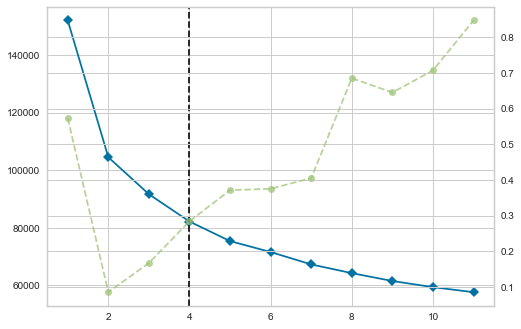

In [6]:
visualizer = KElbowVisualizer(KMeans(), k=(1,12)).fit(x) 

In [7]:
gm = GaussianMixture(n_components=2,random_state=8).fit(x)

In [8]:
df['TGT_Predit_2']= gm.predict(x)

In [11]:
df['TARGET_5Yrs_Inv'].value_counts()

0    6669
1    1331
Name: TARGET_5Yrs_Inv, dtype: int64

In [12]:
df['TGT_Predit_2'].value_counts()

1    4774
0    3226
Name: TGT_Predit_2, dtype: int64

In [10]:
df[['TARGET_5Yrs_Inv','TGT_Predit_2']].value_counts()

TARGET_5Yrs_Inv  TGT_Predit_2
0                1               3762
                 0               2907
1                1               1012
                 0                319
dtype: int64

In [ ]:
alt.data_transformers.disable_max_rows()

In [ ]:
base = alt.Chart(df).mark_point().encode(color='TGT_Predit:N')
base.encode(x='GP', y='CALCFT%') | base.encode(x='GP', y='DREB') | base.encode(x='OREB', y='DREB')| base.encode(x='FGM', y='FGA')

In [ ]:
base = alt.Chart(df).mark_point().encode(color='TARGET_5Yrs_Inv:N')
base.encode(x='GP', y='CALCFT%') | base.encode(x='GP', y='DREB') | base.encode(x='OREB', y='DREB')| base.encode(x='FGM', y='FGA')

In [ ]:
labels = df_cleaned.columns
labels 

In [ ]:
(n_samples, n_features), n_digits = x.shape, np.unique(labels).size
n_digits

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
reduced_data = PCA(n_components=2, random_state=8).fit_transform(x)
kmeans = KMeans(init="k-means++", n_clusters=4, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
reduced_data